In [ ]:
import numpy as np 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf 
%matplotlib inline

warnings.simplefilter('ignore')

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danafatadillarabba","key":"83d806b564a918c17af31cb210c54538"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d crowdflower/twitter-airline-sentiment

  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 246MB/s]


In [ ]:
!unzip -q "/content/twitter-airline-sentiment.zip"

In [ ]:
# reading dataset
df = pd.read_csv('Tweets.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
# Shape of data
df.shape

(14640, 15)

In [ ]:
# Checking null values in data
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
data = df[['airline_sentiment', 'text', 'airline']]
data.head()

,airline_sentiment,text,airline
0,neutral,@VirginAmerica What @dhepburn said.,Virgin America
1,positive,@VirginAmerica plus you've added commercials t...,Virgin America
2,neutral,@VirginAmerica I didn't today... Must mean I n...,Virgin America
3,negative,@VirginAmerica it's really aggressive to blast...,Virgin America
4,negative,@VirginAmerica and it's a really big bad thing...,Virgin America


In [ ]:
data.isnull().sum()

airline_sentiment    0
text                 0
airline              0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
data['airline_sentiment'] = Le.fit_transform(data['airline_sentiment'])

In [ ]:
data

,airline_sentiment,text,airline
0,1,@VirginAmerica What @dhepburn said.,Virgin America
1,2,@VirginAmerica plus you've added commercials t...,Virgin America
2,1,@VirginAmerica I didn't today... Must mean I n...,Virgin America
3,0,@VirginAmerica it's really aggressive to blast...,Virgin America
4,0,@VirginAmerica and it's a really big bad thing...,Virgin America
...,...,...,...
14635,2,@AmericanAir thank you we got on a different f...,American
14636,0,@AmericanAir leaving over 20 minutes Late Flig...,American
14637,1,@AmericanAir Please bring American Airlines to...,American
14638,0,"@AmericanAir you have my money, you change my ...",American


In [ ]:
data_labels = tf.keras.utils.to_categorical(data['airline_sentiment'])

In [ ]:
data_labels

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(data['text'], data_labels, test_size=0.2, random_state=42)

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(2048)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.shuffle(512)

In [ ]:
for example, label in train_ds.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"@AmericanAir that would be appreciated. Just please don't send me to the same page with long form &amp; limited characters.\nDirect email?"
label:  [1. 0. 0.]


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 32

In [ ]:
train_dataset = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'@united Left item n the seatback on UA1260. Is there any way to call DCA to ask if they have the item? Already submitted lost &amp; found report'
 b'@united flight 5187 to be specific. The last two were probably 30 feet apart and within sight of each other'
 b'@AmericanAir  and I forgot about that lounge!\xf0\x9f\x98\x82']

labels:  [[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
VOCAB_SIZE = 10000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'to', 'the', 'i', 'a', 'united', 'you', 'for',
       'flight', 'on', 'and', 'my', 'usairways', 'americanair', 'is',
       'in', 'southwestair', 'jetblue', 'of'], dtype='<U18')

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  6, 215,   1, 894,   3,   1,  10,   1,  15,  71,  95, 114,   2,
         87, 340,   2, 589,  69,  54,  23,   3,   1, 220, 868, 172,  64,
        454, 891],
       [  6,   9,   1,   2,  33,   1,   3, 131, 193, 104, 823, 300,   1,
          1,  11,   1,   1,  19, 685, 197,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 14,  11,   4,   1,  84,  27,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'@united Left item n the seatback on UA1260. Is there any way to call DCA to ask if they have the item? Already submitted lost &amp; found report'
Round-trip:  united left [UNK] n the [UNK] on [UNK] is there any way to call dca to ask if they have the [UNK] already submitted lost amp found report

Original:  b'@united flight 5187 to be specific. The last two were probably 30 feet apart and within sight of each other'
Round-trip:  united flight [UNK] to be [UNK] the last two were probably 30 [UNK] [UNK] and [UNK] [UNK] of each other        

Original:  b'@AmericanAir  and I forgot about that lounge!\xf0\x9f\x98\x82'
Round-trip:  americanair and i [UNK] about that [UNK]                     



In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True, True, True, True]


In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision')])

In [ ]:
history = model.fit(train_dataset, epochs=12,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/12
366/366 [==============================] - 32s 24ms/step - loss: 0.8706 - accuracy: 0.6243 - recall: 0.4319 - precision: 0.7316 - val_loss: 0.7085 - val_accuracy: 0.6802 - val_recall: 0.5594 - val_precision: 0.8262
Epoch 2/12
366/366 [==============================] - 5s 14ms/step - loss: 0.6604 - accuracy: 0.7129 - recall: 0.5721 - precision: 0.8381 - val_loss: 0.6074 - val_accuracy: 0.7333 - val_recall: 0.6271 - val_precision: 0.8338
Epoch 3/12
366/366 [==============================] - 5s 14ms/step - loss: 0.5859 - accuracy: 0.7543 - recall: 0.6446 - precision: 0.8393 - val_loss: 0.5842 - val_accuracy: 0.7646 - val_recall: 0.6490 - val_precision: 0.8396
Epoch 4/12
366/366 [==============================] - 5s 14ms/step - loss: 0.5539 - accuracy: 0.7795 - recall: 0.6864 - precision: 0.8355 - val_loss: 0.5601 - val_accuracy: 0.7646 - val_recall: 0.7073 - val_precision: 0.8171
Epoch 5/12
366/366 [==============================] - 5s 14ms/step - loss: 0.5375 - accuracy: 0.786

In [ ]:
test_loss, test_acc, test_recall, test_precision = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Test Recall:', test_recall)
print('Test Precision:', test_precision)

92/92 [==============================] - 1s 7ms/step - loss: 0.5268 - accuracy: 0.7954 - recall: 0.7773 - precision: 0.8071
Test Loss: 0.5267602801322937
Test Accuracy: 0.7954235076904297
Test Recall: 0.7773224115371704
Test Precision: 0.8070921897888184


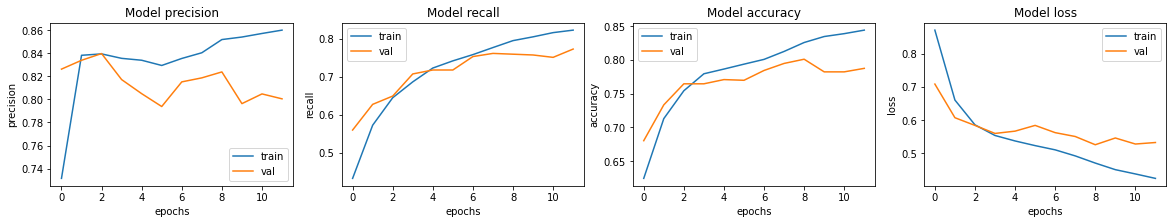

In [ ]:
# Interpreting the Metrics 
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
sample_text = ('The plane service was not that good. But, the ticket is cheaper than others. So if you consider the ticket price, you can choose this airline.')
predictions = model.predict(np.array([sample_text]))
print(Le.inverse_transform([np.argmax(predictions)]))

['negative']


In [ ]:
stack_model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
stack_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision')])

In [ ]:
stack_history = stack_model.fit(train_dataset, epochs=12,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/12
366/366 [==============================] - 28s 36ms/step - loss: 0.8720 - accuracy: 0.6209 - recall: 0.4390 - precision: 0.7247 - val_loss: 0.7124 - val_accuracy: 0.6844 - val_recall: 0.5365 - val_precision: 0.8456
Epoch 2/12
366/366 [==============================] - 8s 23ms/step - loss: 0.6607 - accuracy: 0.7088 - recall: 0.5700 - precision: 0.8363 - val_loss: 0.6246 - val_accuracy: 0.7156 - val_recall: 0.6125 - val_precision: 0.8088
Epoch 3/12
366/366 [==============================] - 14s 37ms/step - loss: 0.5881 - accuracy: 0.7466 - recall: 0.6454 - precision: 0.8324 - val_loss: 0.5904 - val_accuracy: 0.7542 - val_recall: 0.6615 - val_precision: 0.8301
Epoch 4/12
366/366 [==============================] - 8s 23ms/step - loss: 0.5596 - accuracy: 0.7754 - recall: 0.6707 - precision: 0.8367 - val_loss: 0.6058 - val_accuracy: 0.7583 - val_recall: 0.6562 - val_precision: 0.8046
Epoch 5/12
366/366 [==============================] - 8s 23ms/step - loss: 0.5405 - accuracy: 0.78

In [ ]:
test_loss, test_acc, test_recall, test_precision = stack_model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Test Recall:', test_recall)
print('Test Precision:', test_precision)

92/92 [==============================] - 1s 9ms/step - loss: 0.5602 - accuracy: 0.7783 - recall: 0.7572 - precision: 0.7966
Test Loss: 0.5602096915245056
Test Accuracy: 0.7783470153808594
Test Recall: 0.7571721076965332
Test Precision: 0.7966223359107971


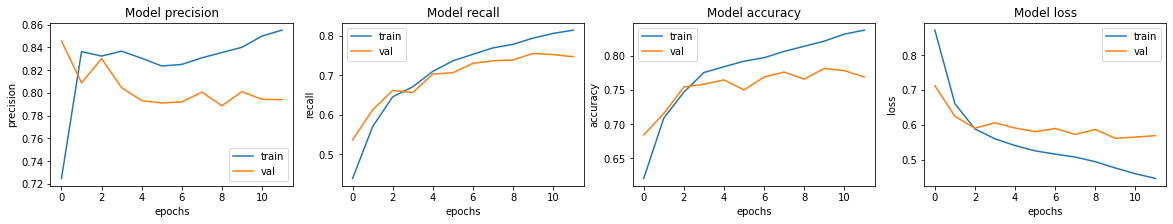

In [ ]:
# Interpreting the Metrics 
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(stack_history.history[met])
    ax[i].plot(stack_history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
sample_text = ('The plane service was not that good. But, the ticket is cheaper than others. So if you consider the ticket price, you can choose this airline.')
predictions = stack_model.predict(np.array([sample_text]))
print(Le.inverse_transform([np.argmax(predictions)]))

['negative']
